In [1]:
import tensorflow as tf
import numpy as np

c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\deves\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\deves\appd

In [2]:
n_neurons = 3
n_features = 10

x = tf.placeholder(tf.float32,(None,n_features))

In [3]:
w = tf.Variable(tf.random_normal([n_features,n_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
b = tf.Variable(tf.ones([n_neurons]))

In [5]:
zw = tf.matmul(x,w)

In [6]:
z = tf.add(zw,b)

In [7]:
a = tf.sigmoid(z)

In [8]:
with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    result = sess.run(a,feed_dict={x:np.random.random([2,n_features])})
    
    print(result)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[0.33886957 0.861071   0.9559201 ]
 [0.3290412  0.83405995 0.9395055 ]]


In [9]:
x_train = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [10]:
x_train

array([ 0.27657008,  1.91090372,  1.65802681,  2.66038875,  4.53983394,
        5.50439154,  7.10617169,  8.46664134,  8.95186338, 11.36750691])

In [11]:
y_train = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [12]:
y_train

array([0.7582268 , 2.09209037, 3.11798034, 4.47099668, 3.23629345,
       4.24329024, 7.59563266, 7.03322889, 7.45167147, 8.99259553])

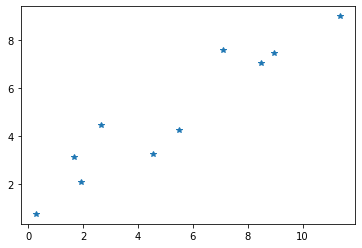

In [14]:
from matplotlib.pyplot import *
plot(x_train,y_train,"*")

In [33]:
m = tf.Variable(0.44)
b = tf.Variable(0.112)

y = mx+b

In [34]:
error = 0
for x,y in zip(x_train,y_train):
    y_hat = m*x + b
    
    error += (y - y_hat)**2

In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [40]:
train = optimizer.minimize(error)

In [47]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    steps = 10000
    
    for i in range(steps):
        sess.run(train)
    
    final_m, final_b = sess.run([m,b])

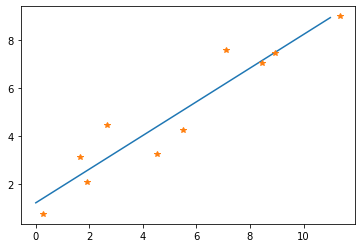

In [48]:
x_test = np.linspace(0,11,10)

y_pred = final_m * x_test + final_b

plot(x_test,y_pred)
plot(x_train,y_train,"*")